<center><img src="talk1.png"></center>

<center><h1>O que é PCA?</h1></center>

<h3>A Análise de Componentes Principais ou PCA (Principal Component Analysis) é uma técnica de análise multivariada que pode ser usada para analisar inter-relações entre um grande número de variáveis e explicar essas variáveis em termos de suas dimensões inerentes (Componentes). <br>

O objetivo é encontrar um meio de condensar a informação contida em várias variáveis originais em um conjunto menor de variáveis estatísticas (componentes) com uma perda mínima de informação.

O número de componentes principais se torna o número de variáveis consideradas na análise, mas geralmente as primeiras componentes são as mais importantes já que explicam a maior parte da variação total.</h3>

<center><h1>PCA NA PRÁTICA</h1></center>

In [782]:
'''
Importação das bibliotecas necessárias e padronizando os plots.
'''
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.random as rd
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = 18, 5
pd.set_option('display.max_colwidth', 50)

In [783]:
#gerando uma lista correlacionada
np.random.seed(5)
linalg = np.linalg
num_samples = 100
num_variables = 2
cov = [[1, 0.9], 
       [0.9, 1]]

L = linalg.cholesky(cov)
uncorrelated = np.random.standard_normal(size=(num_samples,num_variables))
correlated = np.dot(L, uncorrelated.T)
xy = correlated.T
x = xy[:, 0].copy()
y = xy[:, 1].copy()

v = rd.normal(75, 5, (100,1))
dataset = correlated.T.copy()
dataset[:,0] += v[0]
dataset[:,1] += v[0]
x = dataset[:, 0].copy()
y = dataset[:, 1].copy()

In [784]:
'''
Suponha que temos as notas de Física e Estatística de 100 aluanos 
uma turma de Engenharia de Computação e esee é o nosso dataset.
'''
df1 = pd.DataFrame(dataset, columns=['Estatística', "Física"])
display(df1)

,Estatística,Física
0,77.939318,77.750972
1,79.928861,79.575900
2,77.607700,78.286527
3,76.588858,76.421893
4,77.685693,77.523146
...,...,...
95,77.747908,78.222980
96,78.334034,78.375716
97,76.502494,76.997358
98,77.522301,77.415274


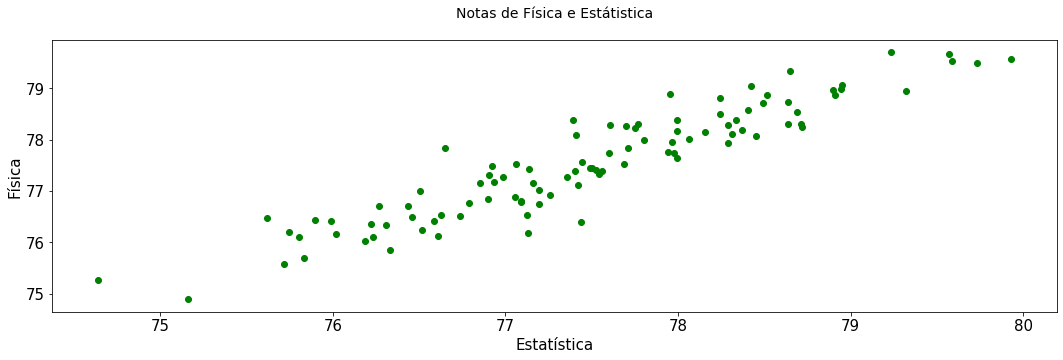

In [785]:
# Plotando nossas notas
fig, ax = plt.subplots()   
ax.scatter(x, y, c='green')
ax.set_xlabel('Estatística')
ax.set_ylabel('Física')
ax.set_title('Notas de Física e Estátistica\n', fontsize = 14) 
ax.grid(False) 
plt.show()

<center><h1>Vamos explorar um pouco mais os nossso dados...</h1></center>

In [786]:
'''
Vou tirar a média de cada atributo e vou subtrair de cada elemento do atributo
'''
#atributo 1 - Estatística 
x = dataset[:, 0].copy()
#atributo 2 - Física
y = dataset[:, 1].copy()

# Subtraindo de cada elemento a média do atributo 1
x -= np.mean(dataset[:,0])
# Subtraindo de cada elemento a média do atributo 2
y -= np.mean(dataset[:,1])
scaled = np.vstack((x, y)).T
#O nosso novo dataset vai ser ficar assim. Ele vai tá centralizado.
df3 = pd.DataFrame(scaled, columns=['Estatística', "Física"])
display(df3)

,Estatística,Física
0,0.454133,0.207106
1,2.443677,2.032034
2,0.122515,0.742660
3,-0.896327,-1.121974
4,0.200509,-0.020720
...,...,...
95,0.262723,0.679113
96,0.848849,0.831850
97,-0.982691,-0.546509
98,0.037116,-0.128592


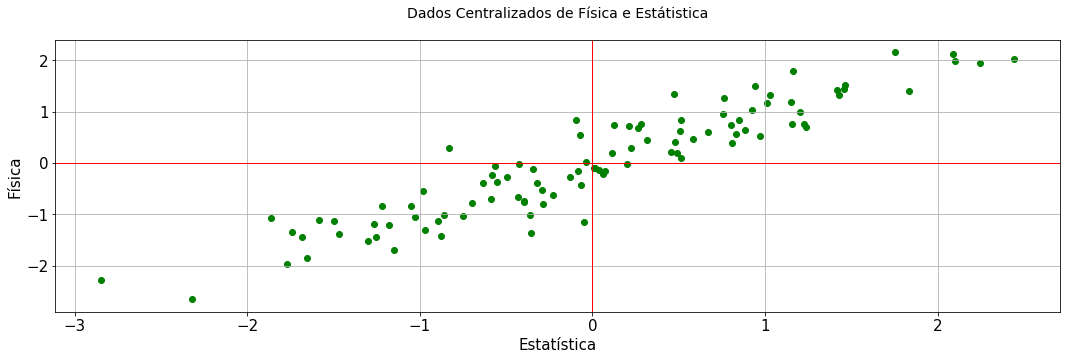

In [787]:
'''
Plotando os nossos dados centralizados e evidenciando o centro do nosso espaço
'''

fig, ax = plt.subplots()   
ax.scatter(scaled[:, 0], scaled[:, 1], c='green')
ax.set_xlabel('Estatística')
ax.set_ylabel('Física')
ax.axvline(lw=1, color ='red') 
ax.axhline(lw=1, color ='red')
ax.set_title('Dados Centralizados de Física e Estátistica\n', fontsize = 14) 
ax.grid(True) 
plt.show()

<div><h1>Ta...Por que fizemos isso?!😄🤨</h1></div>

In [788]:
#Ordenando o nosso dataset de forma crescente, para pegar o ponto P1 
p1 = scaled[df3.sort_values(['Estatística','Física']).index[0]]
#Ordenando o nosso dataset de forma decrescente, para pegar o ponto P2 e P3
p2 = scaled[df3.sort_values(['Estatística','Física'], ascending=False).index[0]]
p3 = scaled[df3.sort_values(['Estatística','Física'], ascending=False).index[1]]

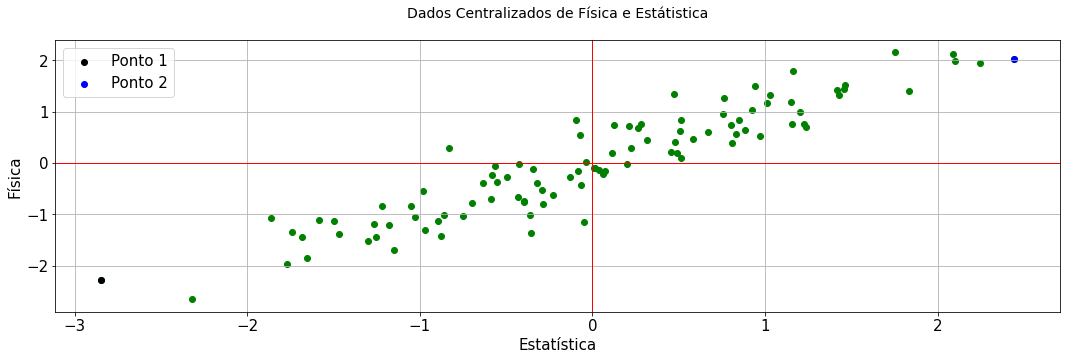

In [790]:
'''
Separei 2 pontos para saber qual a relação entre eles.
'''
fig, ax = plt.subplots()   
ax.scatter(scaled[:, 0], scaled[:, 1], c='green')
ax.scatter(p1[0], p1[1], c='black', label = 'Ponto 1')
ax.scatter(p2[0], p2[1], c='blue', label = 'Ponto 2')
ax.set_xlabel('Estatística')
ax.set_ylabel('Física')
ax.axvline(lw=1, color ='red') 
ax.axhline(lw=1, color ='red') 
ax.set_title('Dados Centralizados de Física e Estátistica\n', fontsize = 14)
ax.legend(loc='best')
ax.grid(True) 
plt.show()

In [791]:
#Produto interno dos elementos de quadrantes diferentes:
print('Produto interno entre os nossos pontos P1 e P2:', np.dot(p1, p2))

#Produto interno dos elementos dos mesmos elementos só que no dataset descentralizado:
print("\nProduto interno do mesmos pontos no dataset original: ", np.dot(dataset[df3.sort_values(['Estatística','Física']).index[0]], dataset[df3.sort_values(['Estatística','Física'], ascending=False).index[0]]))

Produto interno entre os nossos pontos P1 e P2: -11.580342581998984

Produto interno do mesmos pontos no dataset original:  11955.316982187338


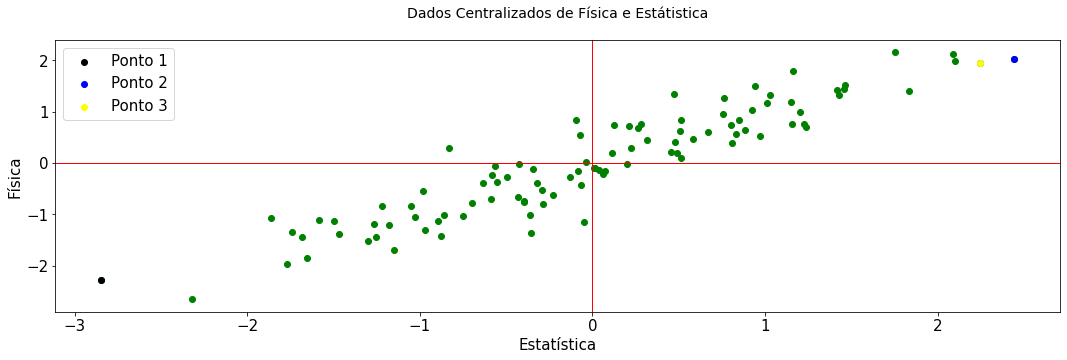

In [792]:
fig, ax = plt.subplots()   
ax.scatter(scaled[:, 0], scaled[:, 1], c='green')
ax.scatter(p1[0], p1[1], c='black', label = 'Ponto 1')
ax.scatter(p2[0], p2[1], c='blue', label = 'Ponto 2')
plt.scatter(p3[0], p3[1], c='yellow', label = 'Ponto 3')
ax.set_xlabel('Estatística')
ax.set_ylabel('Física')
ax.axvline(lw=1, color ='red') 
ax.axhline(lw=1, color ='red') 
ax.set_title('Dados Centralizados de Física e Estátistica\n', fontsize = 14)
ax.legend(loc='best')
plt.show()

In [793]:
#Produto interno dos elementos do primeiro quadrante:
print("Produto interno entre os pontos P2 e P3: ",np.dot(p2, p3))

Produto interno entre os pontos P2 e P3:  9.44944652774783


<h1>Representação do Produto Interno...</h1>

<center><img src= 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Dot_Product.svg/300px-Dot_Product.svg.png'></img></center>

# Quando centralizamos o nosso dataset, nós conseguimos observar qual a similirade dos nossos pontos, através do produto interno. As relações geometricas ficam evidentes.

---

# Variância

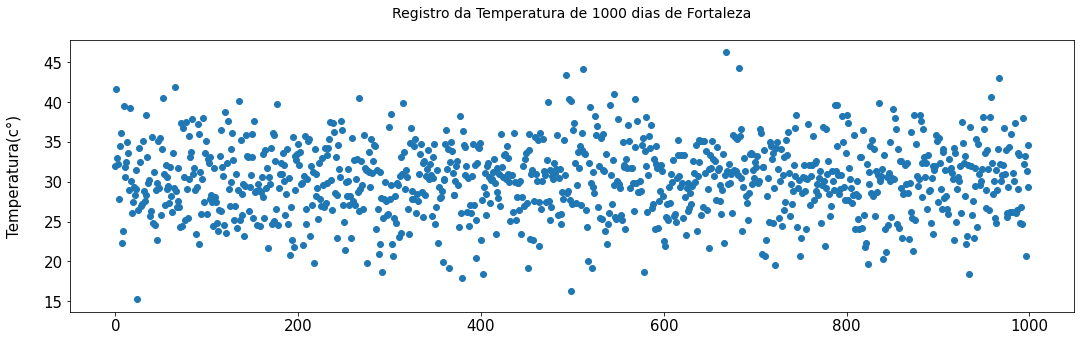

In [794]:
"""
Suponha que esse plot seja do registro de 1000 dias da temperatura de Fortaleza. 
"""
mu, sigma = 30, 4.5 # mean and standard deviation
X = np.random.normal(mu, sigma, 1000)
fig, ax = plt.subplots()
ax.plot(X, 'o')
ax.set_ylabel('Temperatura(c°)\n')
ax.set_title('Registro da Temperatura de 1000 dias de Fortaleza\n', fontsize = 14) 
plt.show()

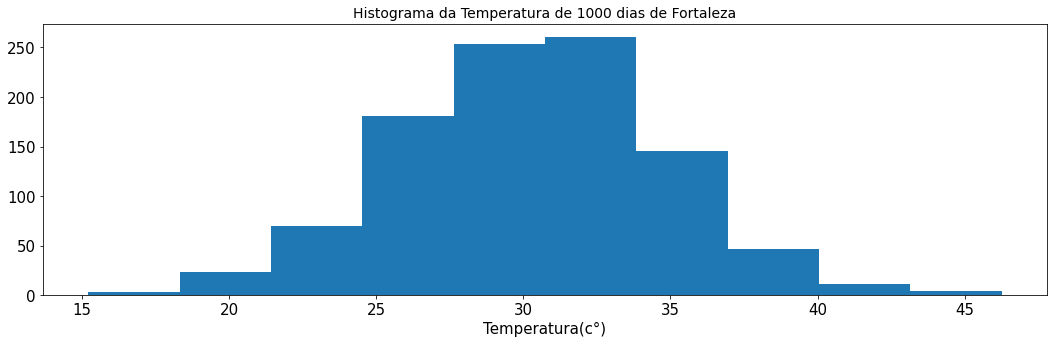

In [795]:
fig, ax = plt.subplots()
ax.hist(X)
ax.set_xlabel('Temperatura(c°)\n')
ax.set_title('Histograma da Temperatura de 1000 dias de Fortaleza', fontsize = 14) 
plt.show()

### Em estatística existe uma propriedade que nos diz que se uma variável possui uma distribuição normal:
#### A probabilidade de pegarmos um elemento que esteja:
- mean(x)-std(x) & mean(x)+std(x) é de 0.6827<br><br>
- mean(x)-2std(x) & mean(x)+2std(x) é de 0.9545<br><br>
- mean(x)-2std(x) & mean(x)+2std(x) é de 0.9973

*std = Desvio Padrão

In [796]:
print("\nA probabilidade de um elemento tá entre a média mais/menos um desvio padrão é: {}\n".format(np.sum(len(X[(np.mean(X) - np.std(X) <= X) & (X<= np.mean(X) + np.std(X))]))/1000))
print("A probabilidade de um elemento tá entre a média mais/menos dois desvios padrão é: {}\n".format(np.sum(len(X[(np.mean(X) - 2*np.std(X) <= X) & (X<= np.mean(X) + 2*np.std(X))]))/1000))
print("A probabilidade de um elemento tá entre a média mais/menos três desvios padrão é: {}\n".format(np.sum(len(X[(np.mean(X) - 3*np.std(X) <= X) & (X<= np.mean(X) + 3*np.std(X))]))/1000))


A probabilidade de um elemento tá entre a média mais/menos um desvio padrão é: 0.682

A probabilidade de um elemento tá entre a média mais/menos dois desvios padrão é: 0.949

A probabilidade de um elemento tá entre a média mais/menos três desvios padrão é: 0.995



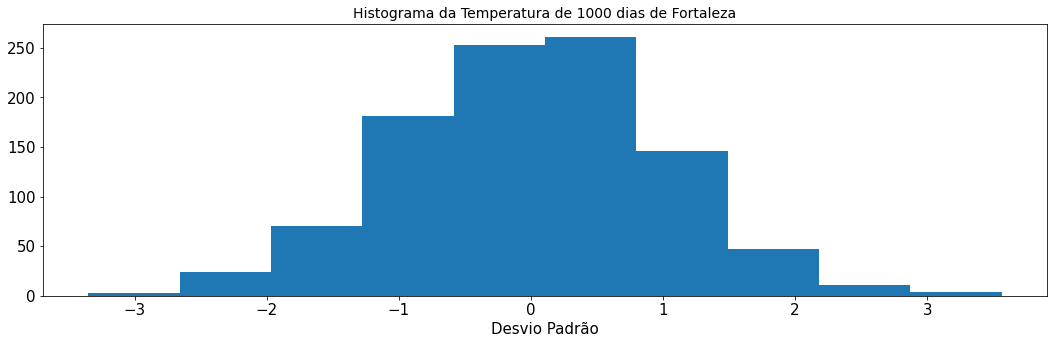

In [797]:
'''
Quando centralizamos e dividimos pelo desvio padrão, nós temos uma visualização melhor do nossos dados, haja visto que eles
fica em função, agora, do desvio padrão.
'''
fig, ax = plt.subplots()
ax.hist((X-np.mean(X))/np.std(X))
ax.set_xlabel('Desvio Padrão')
ax.set_title('Histograma da Temperatura de 1000 dias de Fortaleza', fontsize = 14) 
plt.show()

# Além disso, outra importância de dividir pelo Desvio Padrão é reescalonamento de escala dos Atributos. Assim, deixando todos os nossos atributos na mesma unidade de medida.

# Como a gente calcula as componentes principais?



###### Spoiler: Autovalores e Autovetores

<h3>AutoValores e AutoVetores ferramenta básica e sempre útil:</h3>
<h4>Maneira de comprender a relevância de cada atributo no espaço de dados</h4>
<h4>Permite avaliar a correlações entre os atributos. Assim, eventualmente, um atributo pode ser removido em função dele já ser bem representado por outros atributos.(Redundância de Informação)</h4>

## Algoritmo do PCA
- Padronize os dados
- Calcule a matriz de covariância C, se não dividir pelo desvio padrão. Se dividir pelo desvio padrão para uma correção de escala, calcular a matriz de correlação. 
- Encontre os autovalores da matriz C e seus correspondentes auto-vetores. Os coeficientes da iésima componente principal são dados pelo autovetor associado ao i-ésimo auto-valor

In [798]:
#matriz de correlação - quando dividimos pelo desvio padrão
#matriz que traz informações sobre as correlações ou produtos internos
#entre os nossos atributos
matrizcov = np.cov(scaled, rowvar=0)
matrizcov

array([[1.12579681, 1.06755805],
       [1.06755805, 1.16505908]])

A nossa matriz de covariância é:
$$
R = \left(\begin{array}{cc} 
1.12579681 & 1.06755805\\
1.06755805 & 1.16505908
\end{array}\right)
$$ 

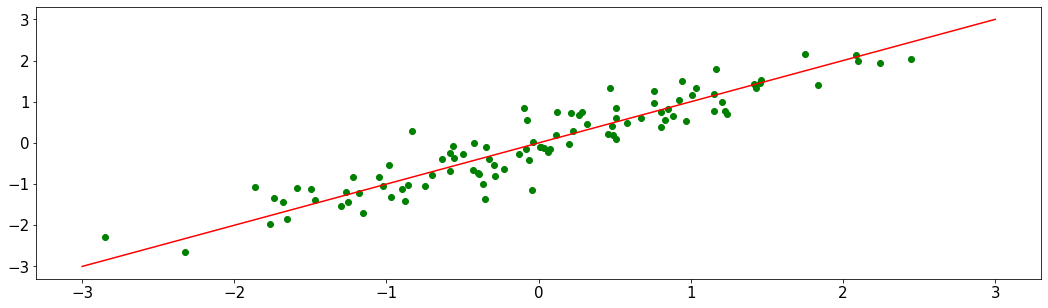

In [799]:
fig, ax = plt.subplots()
ax.scatter(scaled[:, 0], scaled[:, 1], c='green')
ax.plot([-3,3], [-3,3], c='red')
plt.show()

$$
det |R - \lambda I| = \begin{vmatrix}1.12579681 - \lambda  & 1.06755805\\1.06755805 & 1.16505908 - \lambda \end{vmatrix} = 0
$$
<br>
Matriz identidade $$I = \begin{bmatrix}1  & 0\\0 & 1\end{bmatrix}$$


$$
 \big(1.12579681 - \lambda)^{2} -  1.06755805^{2}  \Rightarrow   \lambda ^{2} - 2.25159362  \lambda +  0.12773826728
$$

$$
\lambda1= 2.21316648$$<br>
$$
\lambda2=0.07768941
$$


In [800]:
#matriz de correlação - quando dividimos pelo desvio padrão
#matriz que traz informações sobre as correlações ou produtos internos
#entre os nossos atributos
#matrizcov = np.corrcoef(scaled, rowvar=0)
matrizcov = np.cov(scaled, rowvar=0)
autovalores, autovetores = np.linalg.eig(matrizcov)

autovalores, autovetores = np.linalg.eig(matrizcov)

idx = autovalores.argsort()[::-1]   
autovalores = autovalores[idx]
autovetores = autovetores[:,idx]
print("Auto-valores:\n {}\nAuto-vetores:\n {}\n".format(autovalores, autovetores))

Auto-valores:
 [2.21316648 0.07768941]
Auto-vetores:
 [[-0.70057629 -0.7135775 ]
 [-0.7135775   0.70057629]]



$$
{Para  \lambda1}\\
$$
$$
{autovetor1(PC 1) = (-0.699657 , -0.7144788)}\\
$$<br>
$$ 
Para  \lambda2 
$$

$$
\\autovetor2(PC 2) = (-0.699657 , -0.7144788)
$$

In [801]:
pares_de_auto=[
    (
        np.abs(autovalores[i]),
        autovetores[:, i]
    )for i in range(len(autovalores))
]
pares_de_auto.sort()
pares_de_auto.reverse()
pares_de_auto

[(2.2131664757558975, array([-0.70057629, -0.7135775 ])),
 (0.07768941322560519, array([-0.7135775 ,  0.70057629]))]

In [802]:
df_autovetores=pd.DataFrame(autovetores)

# Change the column names 
df_autovetores.columns =['PC 1', 'PC 2'] 
  
# Change the row indexes 
df_autovetores.index = ['Estatística', 'Física']

df_autovetores

,PC 1,PC 2
Estatística,-0.700576,-0.713578
Física,-0.713578,0.700576


In [803]:
p1 = pares_de_auto[0][1][0]/pares_de_auto[0][1][1]
p2 = pares_de_auto[1][1][0]/pares_de_auto[1][1][1]

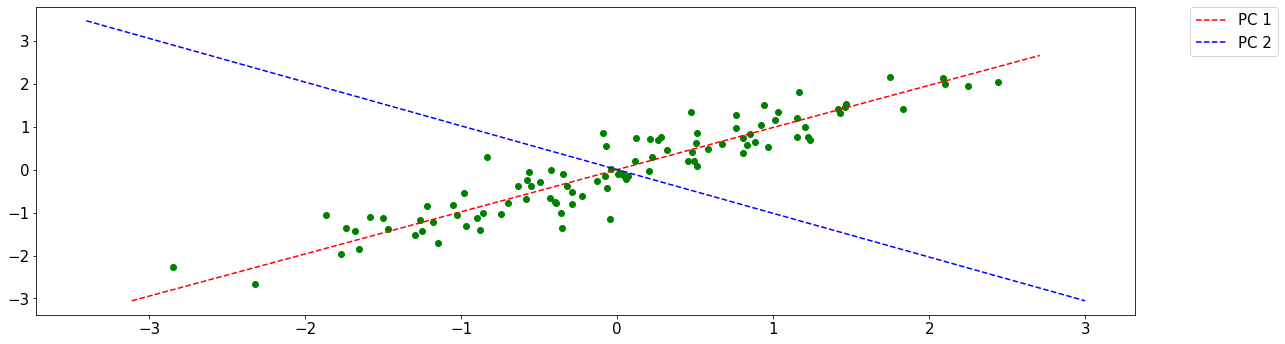

In [804]:
axes = plt.gca()
plt.scatter(scaled[:, 0], scaled[:, 1], c='green')
x_vals = np.array(axes.get_xlim())
y_vals = p1 * x_vals
plt.plot(x_vals, y_vals, '--', color = 'r', label="PC 1")
x_vals = np.array(axes.get_xlim())
y_vals = p2 * x_vals
plt.plot(x_vals, y_vals, '--', color = 'b', label="PC 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(pad=1)
plt.savefig("output.png")
plt.show()

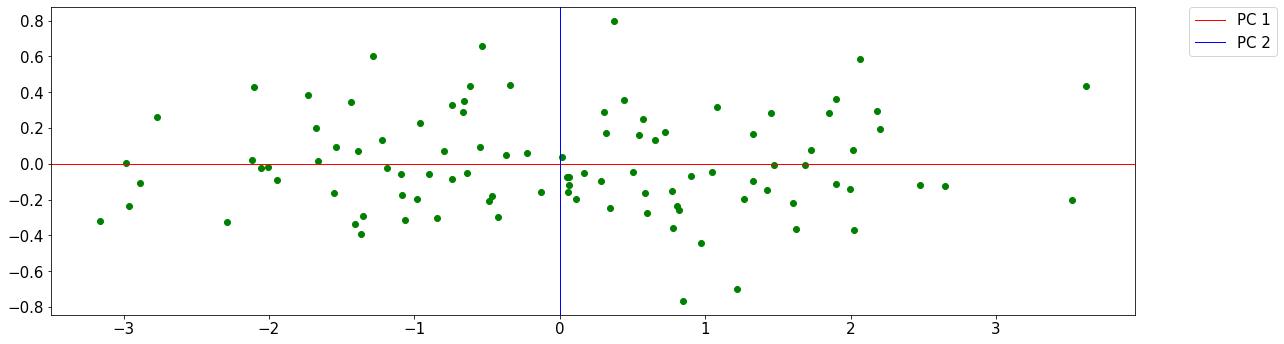

In [805]:
#Fazendo a transformação linear, fazendo a mudança de base, através do produto interno!
scores = np.dot(scaled, autovetores)

plt.scatter(scores[:,0], scores[:,1], color='green')
plt.axhline(lw=1, color ='r', label= 'PC 1')
plt.axvline(lw=1, color ='b', label= 'PC 2') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(pad=1)
plt.show()

# Exemplo Prático

In [806]:
'''
Em um caso um pouco mais real, vamos usar o dataset Wine. O conjunto de dados é constituído por 13 features e 1 target, que
é a coluna 1. A coluna 1 pode assumir 3 valores, 1,2 ou 3. Os atributos são as medidas que caracterizam aquele vinho.
'''
dataset = pd.read_csv('wine.data', sep = ',',names=range(1, 15, 1))
x = dataset.drop(columns=[1]).copy()
y = dataset[1].copy()
display(dataset)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


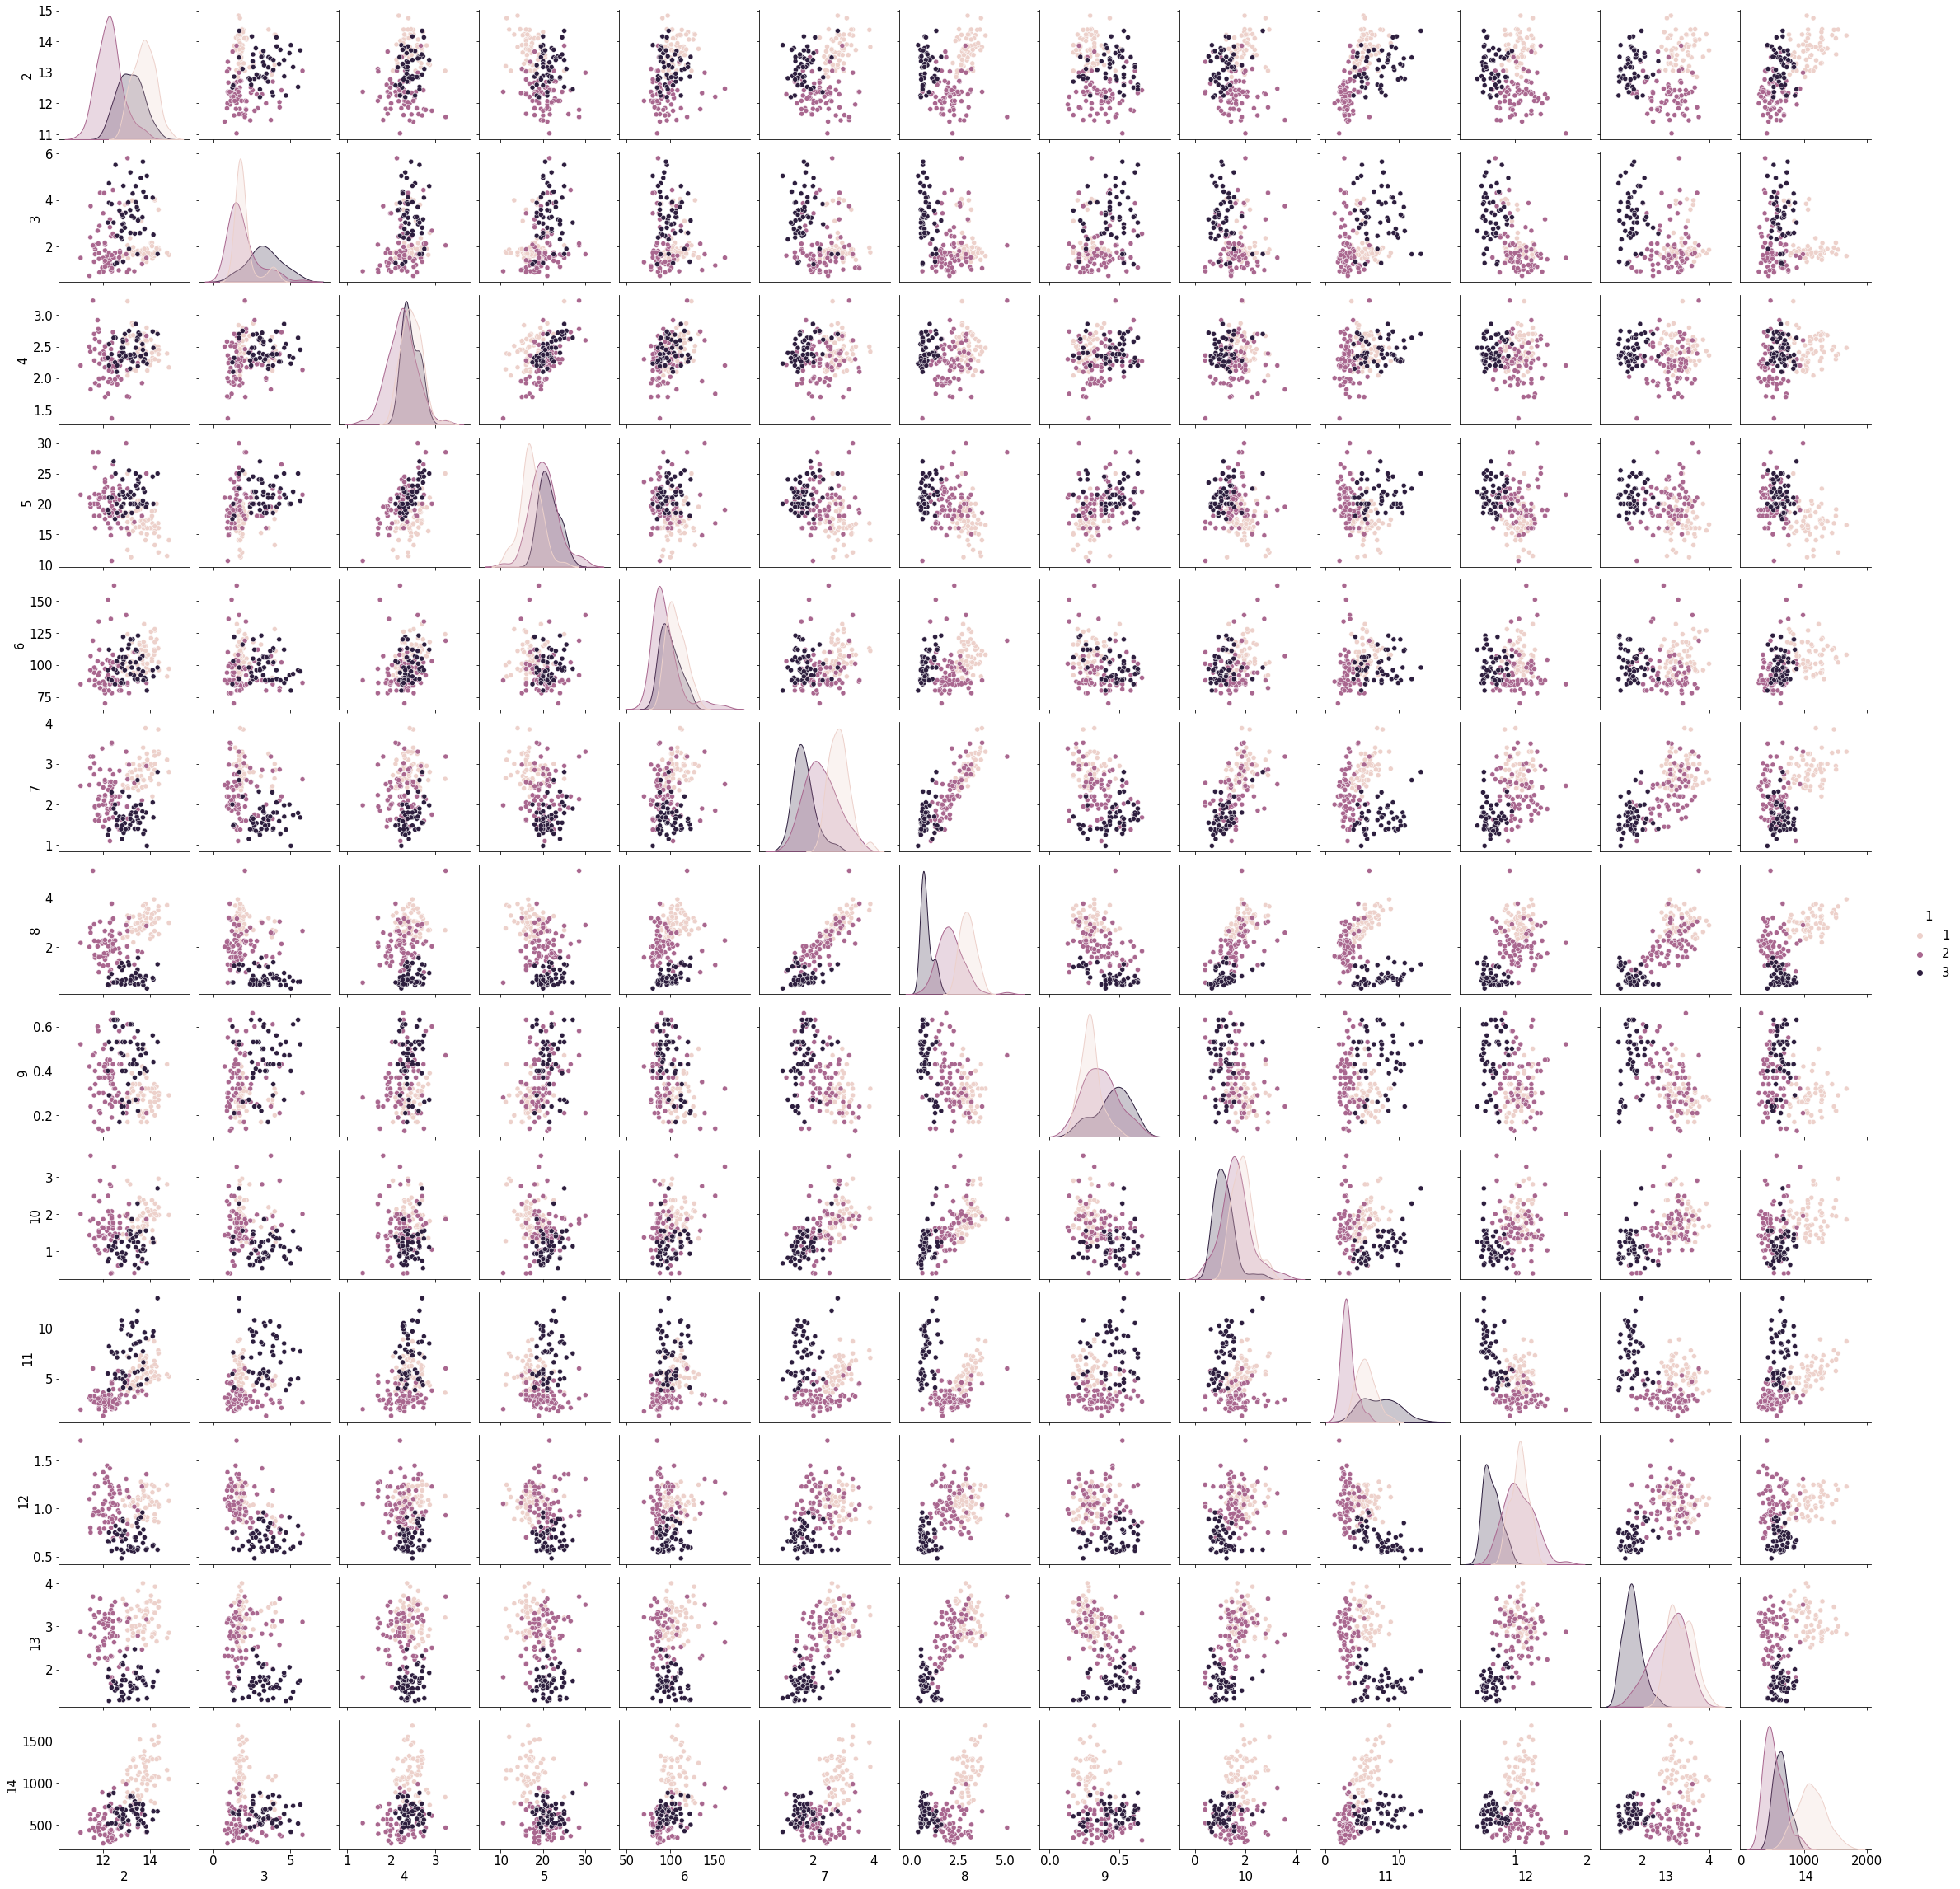

In [807]:
import seaborn as sns
sns.pairplot(dataset, hue=1)

In [809]:
dataset.drop(columns = [1]).describe()

,2,3,4,5,6,7,8,9,10,11,12,13,14
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [810]:
scaled = dataset.to_numpy()
x = scaled[:, 1:14].copy()
y = scaled[:, 0].copy()
for i in range(0, x.shape[1]):
    x[:, i] = (x[:, i] - np.mean(x,  axis=0)[i])/np.std(x,  axis=0)[i]

In [811]:
df_x= pd.DataFrame(x, columns=range(1, 14, 1))
df_x.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [813]:
#matrizcov = np.cov(x, rowvar=0)
matrizcov = np.corrcoef(x, rowvar=0)
autovalores, autovetores = np.linalg.eig(matrizcov)
idx = autovalores.argsort()[::-1]   
autovalores = autovalores[idx]
autovetores = autovetores[:,idx]

In [814]:
pares_de_auto=[
    (
        np.abs(autovalores[i]),
        autovetores[:, i]
    )for i in range(len(autovalores))
]
pares_de_auto.sort()
pares_de_auto.reverse()

In [815]:
names = []
row_name = []
for i in range(1, 14, 1):
    row_name.append('Atributo {}'.format(i))
    names.append('PC {}'.format(i))
df_autovetores=pd.DataFrame(autovetores)

# Change the column names 

df_autovetores.columns = [names] 
  
# Change the row indexes 

df_autovetores.index = [row_name]

df_autovetores

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
Atributo 1,-0.144329,-0.483652,-0.207383,0.017856,0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,0.266286,0.014970
Atributo 2,0.245188,-0.224931,0.089013,-0.536890,-0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,-0.121696,0.025964
Atributo 3,0.002051,-0.316069,0.626224,0.214176,0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,0.049622,-0.141218
Atributo 4,0.239320,0.010591,0.612080,-0.060859,-0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,0.055743,0.091683
Atributo 5,-0.141992,-0.299634,0.130757,0.351797,-0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,-0.062220,0.056774
Atributo 6,-0.394661,-0.065040,0.146179,-0.198068,0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,0.303882,-0.463908
Atributo 7,-0.422934,0.003360,0.150682,-0.152295,0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,0.042899,0.832257
Atributo 8,0.298533,-0.028779,0.170368,0.203301,0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,-0.042352,0.114040
Atributo 9,-0.313429,-0.039302,0.149454,-0.399057,-0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,0.095553,-0.116917
Atributo 10,0.088617,-0.529996,-0.137306,-0.065926,0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,-0.604222,-0.011993


In [816]:
soma = 0
for i in range(0, 13,1):
    soma += np.var(x[:, i])
    
print("Soma da variância dos atributos: ", soma)
print("Soma dos auvalores: ",np.sum(autovalores))

Soma da variância dos atributos:  13.000000000000004
Soma dos auvalores:  13.000000000000002


In [817]:
'''
Soma acumulada das variâncias explicadas por cada autovalor.. 
'''
total = sum(autovalores)
var_exp = [
    (i/total)*100 for i in sorted(
        autovalores, reverse = True
    )
]
print('Meus autovalores:\n', autovalores)
cum_var_exp = np.cumsum(var_exp)
print('\nSoma acumulada das importâncias de cada componente principal:\n\n',cum_var_exp)

Meus autovalores:
 [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]

Soma acumulada das importâncias de cada componente principal:

 [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


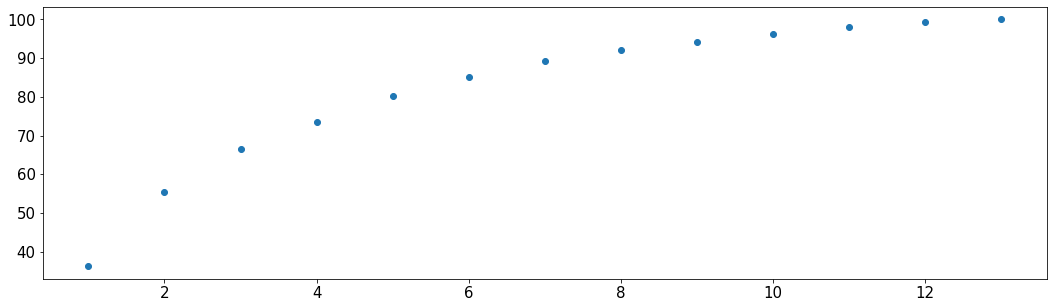

In [818]:
plt.scatter(range(1, len(cum_var_exp)+1), cum_var_exp)
plt.show()

In [819]:
scores = np.dot(x, autovetores)
dataset2 = pd.DataFrame(scores, columns=range(1, 14, 1))
dataset2[14] = y
display(dataset2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-3.316751,-1.443463,-0.165739,0.215631,-0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,-0.540810,-0.066239,1.0
1,-2.209465,0.333393,-2.026457,0.291358,0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,-0.388238,0.003637,1.0
2,-2.516740,-1.031151,0.982819,-0.724902,0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,-0.000584,0.021717,1.0
3,-3.757066,-2.756372,-0.176192,-0.567983,0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,0.242020,-0.369484,1.0
4,-1.008908,-0.869831,2.026688,0.409766,-0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,0.216664,-0.079364,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.370524,-2.216289,-0.342570,-1.058527,0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,-0.170786,-0.114427,3.0
174,2.601956,-1.757229,0.207581,-0.349496,-0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,0.279431,-0.187371,3.0
175,2.677839,-2.760899,-0.940942,-0.312035,-1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,-0.698766,0.072078,3.0
176,2.387017,-2.297347,-0.550696,0.688285,-0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,-0.339821,-0.021866,3.0


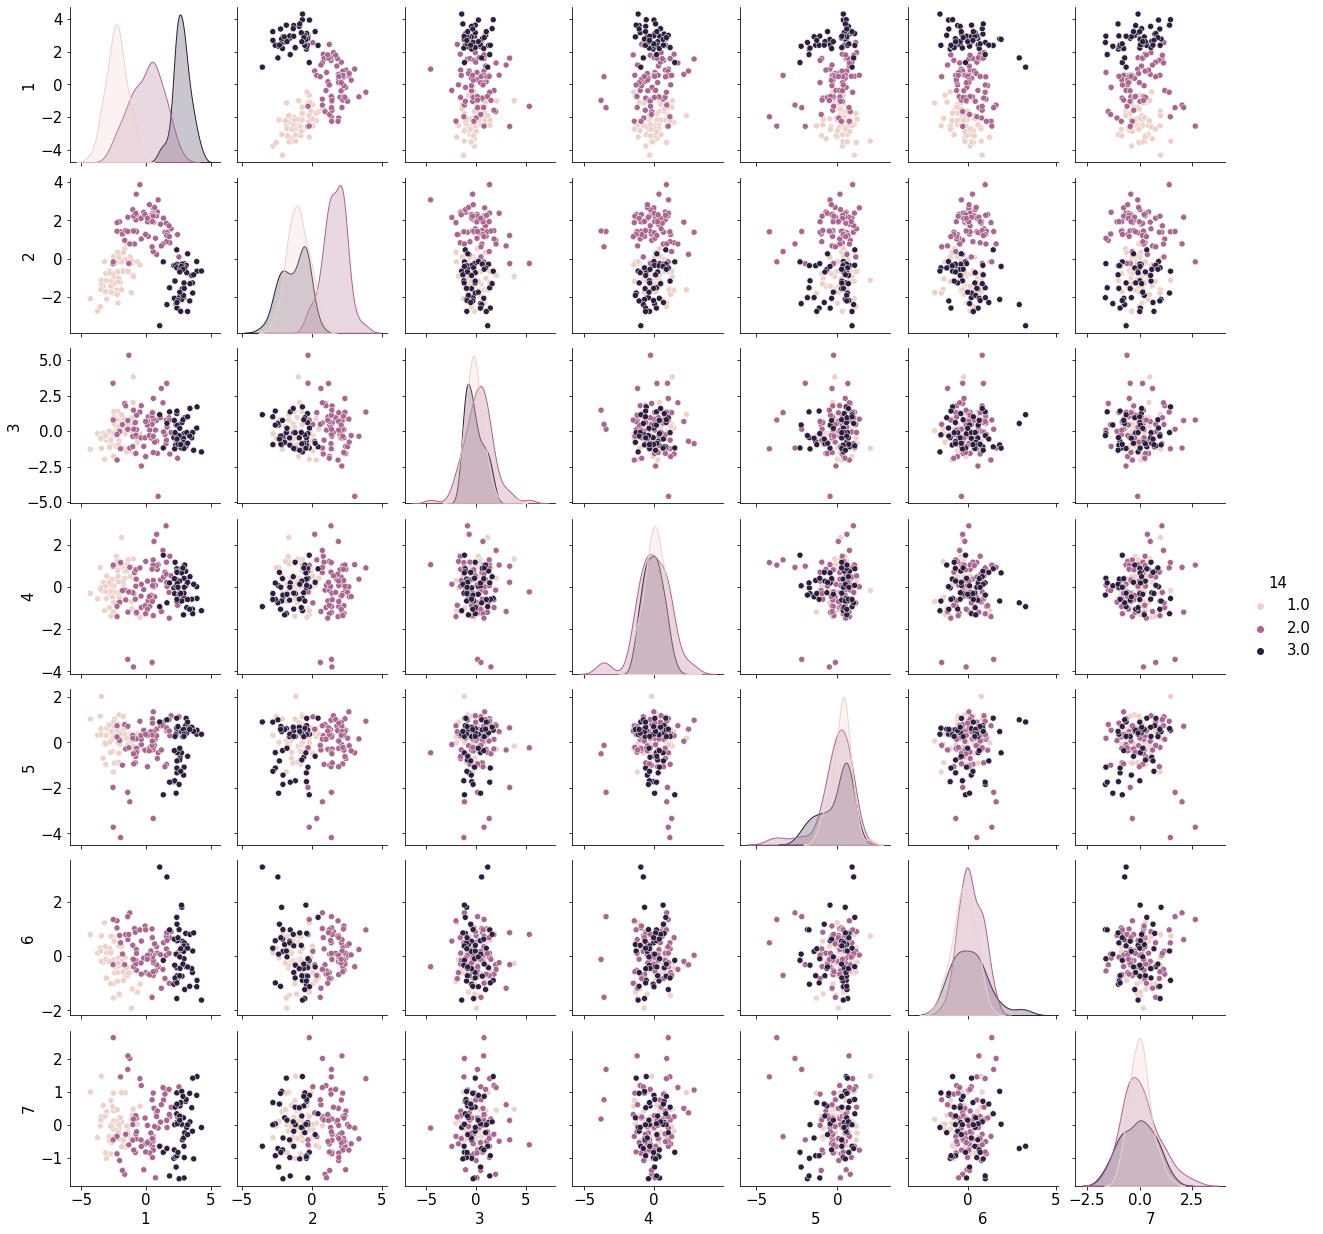

In [820]:
colunas = [1,2,3,4,5,6,7,14]
dataset2[:][colunas]
sns.pairplot(dataset2[:][colunas], hue=14)

In [821]:
from sklearn.model_selection import train_test_split

x = dataset2.drop(columns=[14]).copy()
y = dataset2[14].copy()
colunas = [1,2,3,4,5,6,7,8,9,10,11,12,13]
#Número de componentes principais que eu vou usar
num_pcs = 5

x_train, x_test, y_train, y_test = train_test_split(x[:][colunas[:num_pcs]], y, test_size = 0.30)

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=9)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


## Usando o Dataset Original

In [822]:
x = dataset.drop(columns=[1]).copy()
y = dataset[1].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=9)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6111111111111112
